In [1]:
import pandas as pd
import numpy as np
import calculate_cleavage_rate as clv
%matplotlib inline 
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('ticks')
current_colors = sns.color_palette()
reload(clv)
import sys
import Nucleaseq_data_processing as processing
reload(processing)
import read_model_ID as model
reload(model)
guide = 20

In [2]:
filename = 'WT_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'
path_to_data = '../data_nucleaseq_Finkelsteinlab/targetE/'
xdata, ydata, yerr = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path_to_data)
_, ydatawa, yerrwa = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path_to_data,True,False,False,False)
#_, ydatamedian, yerrmedian = processing.prepare_multiprocessing_nucleaseq(filename, path_to_data, True)
_, ydatalog, yerrlog = processing.prepare_multiprocessing_combined('1',filename,'../Data_Boyle/',path_to_data,True,False,True,False)

datacompclv = []
datacompon = []
pos = []
kclv = []
kon = []

i = 1
while i < guide+1:
    for a in range(len(xdata)):
        if len(xdata[a])==1 and xdata[a][0]==i:
            pos.append(xdata[a][0])
            kclv.append(ydatawa[a][0][0])
            kon.append(ydatawa[a][1][0])
            datacompclv.append(ydata[a][0])
            datacompon.append(ydata[a][1])
            
            i = i + 1
    
pos.append(21)
kclv.append(ydatawa[0][0][0])
kon.append(ydatawa[0][1][0])
datacompclv.append(ydata[0][0])
datacompon.append(ydata[0][1])


pos = np.array(pos)
kclv = np.array(kclv)
kon = np.array(kon)

C:\Users\stijn\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


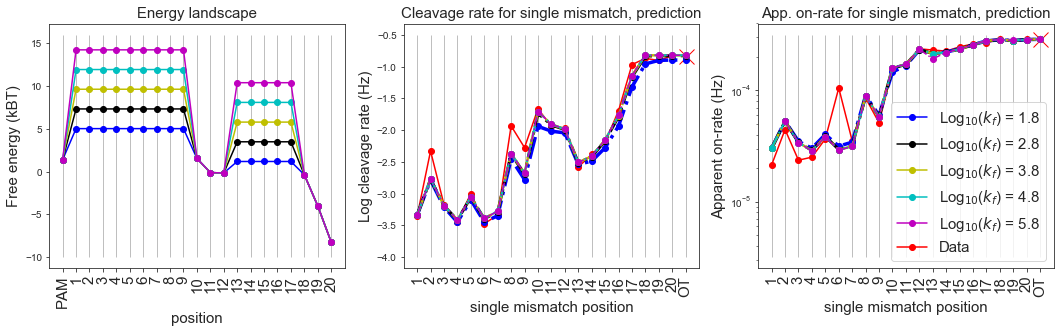

In [3]:
legend = False
f,ax = plt.subplots(1,3,sharey=False,figsize=[18.,4.5])
colour = ['b','k','y','c','m','g','slateblue']

model_ID = 'Clv_Saturated_edit_boyle_landscape_flat+On_edit_boyle_landscape_flat'; parnum = '25'
filename = 'fit_17_5_2019_sim_2.txt'
path = '../fits_Stijn/17_5_2019/'
data = pd.read_table(path+filename,index_col=False)
chi = data.loc[:,'Potential']
final_par = data.loc[np.argmin(chi),'Parameter 1':'Parameter '+parnum]
parameters = np.array(final_par.values)

plot2, = ax[1].plot(range(1,21),kclv[0:20],marker='o',color='r',label='Weighted average')
plot3 = ax[1].plot(21,kclv[20],marker='x',color='r',markersize=15,label='On-target')
if legend:
    ax[1].legend(handles=[plot1[0],plot2[0],plot3[0],plot4[0]],loc='center left',bbox_to_anchor=(1,0.5),fontsize=15)
ax[1].set_xlabel('single mismatch position', fontsize=15)
ax[1].set_ylabel('Log cleavage rate (Hz)', fontsize=15)
ax[1].set_title('Cleavage rate for single mismatch, prediction', fontsize=15)
ax[1].set_xticks(range(1,22));
ax[1].set_xticklabels(range(1,21)+['OT'],fontsize=15,rotation='vertical')
ax[1].vlines(range(1,22),-4,-0.5,color='grey',linewidth=0.5);
#plt.axis([0,22,-7,0]);

plot2, = ax[2].plot(range(1,21),kon[0:20],marker='o',color='r',label='Data')
plot3 = ax[2].plot(21,kon[20],marker='x',color='r',markersize=15,label='On-target')
if legend:
    ax[2].legend(handles=[plot1[0],plot2[0],plot3[0],plot4[0]],loc='center left',bbox_to_anchor=(1,0.5),fontsize=15)
ax[2].set_xlabel('single mismatch position', fontsize=15)
ax[2].set_ylabel('Apparent on-rate (Hz)', fontsize=15)
ax[2].set_title('App. on-rate for single mismatch, prediction', fontsize=15)
ax[2].set_xticks(range(1,22));
ax[2].set_xticklabels(range(1,21)+['OT'],fontsize=15,rotation='vertical')
ax[2].vlines(range(1,22),10**-5.5,10**-3.5,color='grey',linewidth=0.5);
#ax[0][1].axis([0,22,10**-1.5,10**0])

ax[0].set_xlabel('position',fontsize=15)
ax[0].set_ylabel('Free energy (kBT)',fontsize=15)
ax[0].set_title('Energy landscape',fontsize=15)
ax[0].vlines(range(0,21),-10,16,color='grey',linewidth=0.5);
ax[0].set_xticks(range(0,21));
ax[0].set_xticklabels(['PAM'] + range(1,21),fontsize=15,rotation='vertical')

c = [0.1,1.,10.,100.,1000.]
landscape = []

for m in range(len(c)):
    parameters_temp = parameters.copy()
    parameters_temp[0] += np.log(c[m])
    parameters_temp[1] += np.log(c[m])
    parameters_temp[-2] += np.log10(c[m])

    k = np.zeros(21)
    on = np.zeros(21)

    for i in range(1,guide+1):
        mismatch = [i]
        k[i-1],on[i-1] = clv.calc_clv_on(parameters_temp,model_ID,mismatch,guide)

    k[-1],on[-1] = clv.calc_clv_on(parameters_temp,model_ID,[],guide)

    plot4 = ax[1].plot(range(1,22),np.log10(k),color=colour[m],marker='o',label='Predicted kclv',linewidth=3.5-m*0.5,linestyle = '-.')
    if c[m] != 1000.:
        plot4 = ax[2].semilogy(range(1,22),on,marker='o',color=colour[m],label='Predicted on-rate',linewidth=3.5-m*0.5,linestyle = '-.')
    else:
        plot4 = ax[2].semilogy(range(2,22),on[1:],marker='o',color=colour[m],label='Predicted on-rate',linewidth=3.5-m*0.5,linestyle = '-.')

    
    model_ID_clv,model_ID_on,parameters_clv,parameters_on = model.combined_model(parameters_temp,model_ID)
    energies,rates = model.unpack_parameters(parameters_on,model_ID_on,20)
    energies[0] *= -1.
    
    landscapem = ax[0].plot(range(0,21),-np.cumsum(energies[0:21]),marker = 'o',color=colour[m],linewidth=1.5,label='Log$_{10}$($k_f$) = ' + str(np.round(parameters_temp[-2],1)))
    landscape.append(landscapem[0])
landscape.append(plot2)    
ax[2].legend(handles=landscape,fontsize=15)

In [4]:
m = 4

parameters_temp = parameters.copy()
parameters_temp[0] += np.log(c[m])
parameters_temp[1] += np.log(c[m])
parameters_temp[-2] += np.log10(c[m])


_,model_on,_,parameters_on = model.combined_model(parameters_temp,model_ID)
epsilon, forward_rates = model.unpack_parameters(parameters_on,model_on)
energies = clv.get_energies(epsilon,[1])
backward_rates = clv.get_backward_rates(energies,forward_rates)
matrix = clv.get_master_equation(parameters_on,[1],model_on,20)
#print matrix


print clv.get_backward_rates(energies,forward_rates)

[0.00000000e+00 1.57877038e-02 8.20349948e+13 5.86160558e+05
 5.86160558e+05 5.86160558e+05 5.86160558e+05 5.86160558e+05
 5.86160558e+05 5.86160558e+05 5.86160558e+05 1.79743956e+00
 1.12267088e+05 5.58669879e+05 2.24603097e+10 5.86160558e+05
 5.86160558e+05 5.86160558e+05 5.86160558e+05 1.24250857e+01
 1.52639791e+04 8.66527572e+03]


In [5]:
c = 1000.
model_id = 'On_edit_boyle_landscape_flat'

parameters_temp = parameters.copy()
parameters_temp[0] += np.log(c)
parameters_temp[1] += np.log(c)
parameters_temp[-2] += np.log10(c)
parameters_temp = parameters_temp[:-1]

mismatch = [1]

ini = np.array([1.0] + [0.0] * (21))

epsilon,rates = model.unpack_parameters(parameters_temp,model_id)
back = clv.get_backward_rates(-epsilon[:-20],rates)
print back
matrix = clv.build_rate_matrix(rates,back)
P = clv.get_Probability(matrix,ini)
print P
print sum(P)
print 'normalisation condition does not hold anymore'





[0.00000000e+00 9.80919773e-04 2.23934594e+11 5.86160558e+05
 5.86160558e+05 5.86160558e+05 5.86160558e+05 5.86160558e+05
 5.86160558e+05 5.86160558e+05 5.86160558e+05 1.79743956e+00
 1.12267088e+05 5.58669879e+05 2.24603097e+10 5.86160558e+05
 5.86160558e+05 5.86160558e+05 5.86160558e+05 1.24250857e+01
 1.52639791e+04 8.66527572e+03]
[2.87851980e-05 1.15864906e-04 3.03282475e-10 3.03283896e-10
 3.03285316e-10 3.03286736e-10 3.03288157e-10 3.03289577e-10
 3.03290998e-10 3.03292418e-10 3.03293839e-10 9.89072024e-05
 5.16406921e-04 5.41817951e-04 1.41401573e-08 1.41401947e-08
 1.41402321e-08 1.41402695e-08 1.41403068e-08 6.67078868e-04
 2.56168670e-02 1.73284701e+00]
1.7604328066420538
normalisation condition does not hold anymore
